# 7.*WRITE A PROGRAM TO COMPARE THE PERFORMANCE OF SGD, ADAM, AND RMS PROP OPTIMIZERS ON A GIVEN DATASET.*




In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import load_iris
data = load_iris()
features = data.data
target = data.target.reshape(-1, 1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(target)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(features)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [ ]:
np.random.seed(12)
w_sgd = np.random.randn(X.shape[1], y.shape[1])
b_sgd = np.zeros((1, y.shape[1]))
w_adam = w_sgd.copy()
b_adam = b_sgd.copy()
w_rmsprop = w_sgd.copy()
b_rmsprop = b_sgd.copy()

In [ ]:
lr = 0.01
epochs = 200
momentum_adam = np.zeros_like(w_adam)
v_adam = np.zeros_like(w_adam)
v_rmsprop = np.zeros_like(w_rmsprop)
beta1, beta2 = 0.9, 0.999
eps = 1e-8

In [ ]:
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

def cross_entropy(y_true, y_pred):
    return -np.mean(np.sum(y_true * np.log(y_pred + 1e-8), axis=1))

In [ ]:
loss_sgd, loss_adam, loss_rmsprop = [], [], []
for epoch in range(epochs):
    logits_sgd = X_train @ w_sgd + b_sgd
    logits_adam = X_train @ w_adam + b_adam
    logits_rmsprop = X_train @ w_rmsprop + b_rmsprop

    y_pred_sgd = softmax(logits_sgd)
    y_pred_adam = softmax(logits_adam)
    y_pred_rmsprop = softmax(logits_rmsprop)

    loss_sgd.append(cross_entropy(y_train, y_pred_sgd))
    loss_adam.append(cross_entropy(y_train, y_pred_adam))
    loss_rmsprop.append(cross_entropy(y_train, y_pred_rmsprop))

    dW = X_train.T @ (y_pred_sgd - y_train) / X_train.shape[0]
    db = np.mean(y_pred_sgd - y_train, axis=0, keepdims=True)

    w_sgd -= lr * dW
    b_sgd -= lr * db

    momentum_adam = beta1 * momentum_adam + (1 - beta1) * dW
    v_adam = beta2 * v_adam + (1 - beta2) * (dW ** 2)
    m_hat = momentum_adam / (1 - beta1 ** (epoch + 1))
    v_hat = v_adam / (1 - beta2 ** (epoch + 1))
    w_adam -= lr * m_hat / (np.sqrt(v_hat) + eps)
    b_adam -= lr * db

    v_rmsprop = 0.9 * v_rmsprop + 0.1 * (dW ** 2)
    w_rmsprop -= lr * dW / (np.sqrt(v_rmsprop) + eps)
    b_rmsprop -= lr * db

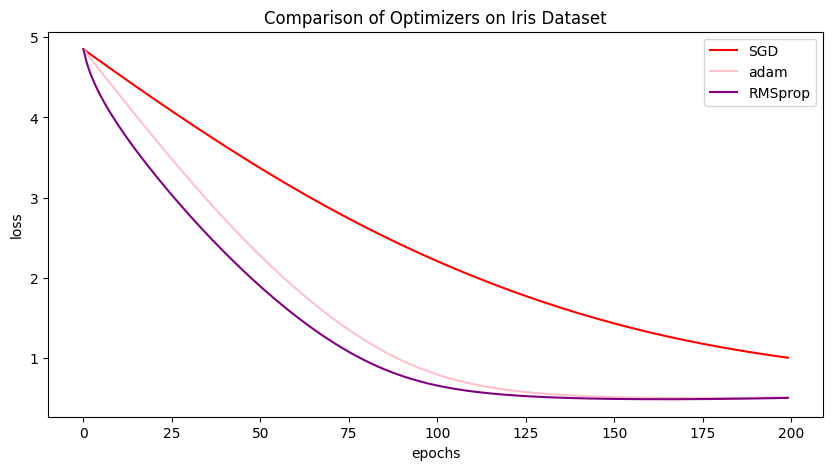

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(loss_sgd, label='SGD',color = "red")
plt.plot(loss_adam, label='adam',color = "pink")
plt.plot(loss_rmsprop, label='RMSprop',color = 'purple')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.title('Comparison of Optimizers on Iris Dataset')
plt.show()